In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [2]:
def load_data(filename):
    data = pd.read_csv(filename, skiprows=6, sep=' ', names=['index', 'x', 'y'], skipfooter=1, engine='python')
    return data.set_index('index')

def euclidean_distance(p1, p2):
    return round(np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2))

def calculate_distance_matrix(coords):
    size = coords.shape[0]
    matrix = np.zeros((size, size), dtype=int)
    coords_values = coords.values
    for i in range(size):
        for j in range(size):
            if i != j:
                matrix[i][j] = euclidean_distance(coords_values[i], coords_values[j])
            else:
                matrix[i][j] = 0
    return matrix

def initialize_two_greedy_cycles(distance_matrix):
    n = len(distance_matrix)
    start1 = random.randint(0, n-1)
    nearest1 = np.argmin([distance_matrix[start1][i] if i != start1 else np.inf for i in range(n)])
    cycle1 = [start1, nearest1, start1]
    visited = set([start1, nearest1])

    distances_to_start1 = [distance_matrix[start1][i] for i in range(n)]
    start2 = np.argmax(distances_to_start1)
    while start2 in visited:
        distances_to_start1[start2] = -np.inf
        start2 = np.argmax(distances_to_start1)
        
    nearest2 = np.argmin([distance_matrix[start2][i] if i != start2 and i not in visited else np.inf for i in range(n)])
    cycle2 = [start2, nearest2, start2]
    visited.update([start2, nearest2])

    return cycle1, cycle2, visited

def calculate_cycle_length(cycle, distance_matrix):
    total_length = 0
    for i in range(len(cycle)):
        total_length += distance_matrix[cycle[i]][cycle[(i + 1) % len(cycle)]]
    return total_length

def plot_cycles(coords, cycle1, cycle2, title = 'Visualization of Two Cycles'):
    x_coords, y_coords = coords['x'].values, coords['y'].values

    plt.figure(figsize=(10, 8))
    
    
    x1 = [x_coords[i] for i in cycle1]
    y1 = [y_coords[i] for i in cycle1]
    plt.plot(x1, y1, 'ro-', label='Cycle 1')

    
    x2 = [x_coords[i] for i in cycle2]
    y2 = [y_coords[i] for i in cycle2]
    plt.plot(x2, y2, 'bo-', label='Cycle 2')

    plt.scatter(x_coords, y_coords, color='gray', zorder=3)
    
    for i in range(len(x_coords)):
        plt.annotate(str(i), (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()



## Heurystyka z 2-żalem (2-regret)

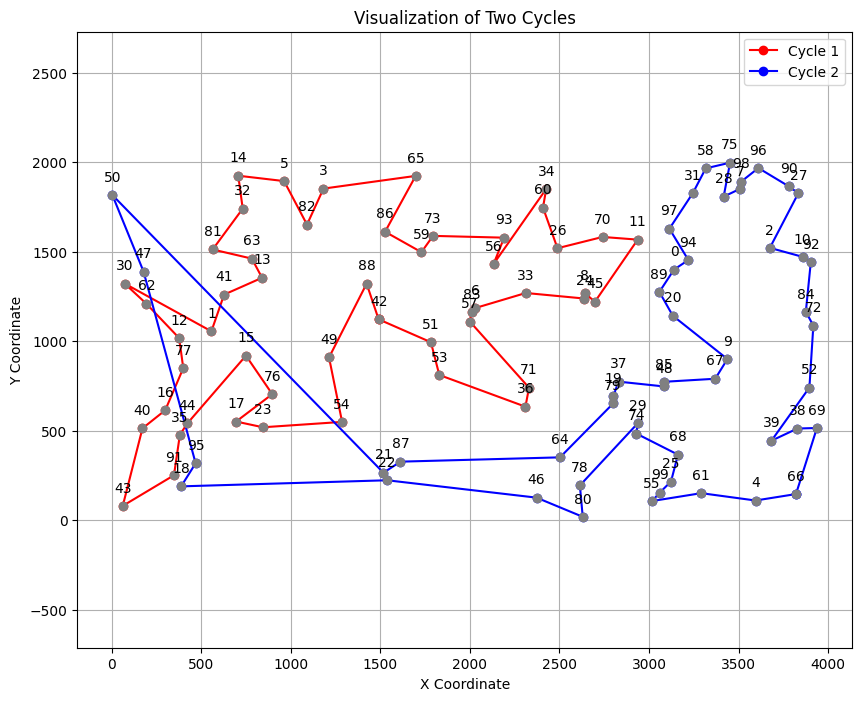

Cycle 1: [42, 51, 53, 36, 71, 57, 83, 6, 33, 24, 8, 45, 11, 70, 26, 60, 34, 56, 93, 73, 59, 86, 65, 3, 82, 5, 14, 32, 81, 63, 13, 41, 1, 30, 62, 12, 77, 16, 40, 43, 91, 35, 44, 15, 76, 17, 23, 54, 49, 88, 42] Length: 13272
Cycle 2: [66, 69, 38, 39, 52, 72, 84, 92, 10, 2, 27, 90, 96, 98, 7, 28, 75, 58, 31, 97, 94, 0, 89, 20, 9, 67, 85, 48, 37, 19, 79, 64, 87, 21, 50, 47, 95, 18, 22, 46, 80, 78, 29, 74, 68, 25, 99, 55, 61, 4, 66] Length: 15074
score: 28346


In [3]:
def insert_with_2_regret(cycle, visited, distance_matrix):
    insertions = []

    for vertex in range(len(distance_matrix)):
        if vertex not in visited:
            insertion_costs = []

            
            for position in range(len(cycle) - 1):
                
                cost_increase = (distance_matrix[cycle[position]][vertex] +
                                 distance_matrix[vertex][cycle[position + 1]] -
                                 distance_matrix[cycle[position]][cycle[position + 1]])
                insertion_costs.append((cost_increase, position))

            
            if len(insertion_costs) >= 2:
                insertion_costs.sort()
                min_cost_1 = insertion_costs[0][0]
                min_cost_2 = insertion_costs[1][0]
                
                
                regret = min_cost_2 - min_cost_1
                weight = regret - 0.37 * min_cost_1

                
                insertions.append((weight, vertex, insertion_costs[0][1]))

    
    insertions.sort(reverse=True)

    if insertions:
        
        highest_regret = insertions[0]
        best_vertex = highest_regret[1]
        best_position = highest_regret[2]

        
        cycle.insert(best_position + 1, best_vertex)
        visited.add(best_vertex)

    return cycle

def expand_cycles_with_2_regret(coords, distance_matrix):
    cycle1, cycle2, visited = initialize_two_greedy_cycles(distance_matrix)
    total_vertices = len(coords)

    while len(visited) < total_vertices:
        if len(visited) < total_vertices:
            cycle1 = insert_with_2_regret(cycle1, visited, distance_matrix)
        if len(visited) < total_vertices:
            cycle2 = insert_with_2_regret(cycle2, visited, distance_matrix)

    return cycle1, cycle2, calculate_cycle_length(cycle1, distance_matrix), calculate_cycle_length(cycle2, distance_matrix)

filename_kroA100 = 'kroA100.tsp'
filename_kroB100 = 'kroB100.tsp'
filenname_kroA200 = 'kroA200.tsp'
filename_kroB200 = 'kroB200.tsp'
coords_A = load_data(filename_kroA100)
coords_B = load_data(filename_kroB100)
coords_A200 = load_data(filenname_kroA200)
coords_B200 = load_data(filename_kroB200)
distance_matrix_A = calculate_distance_matrix(coords_A)
distance_matrix_B = calculate_distance_matrix(coords_B)
distance_matrix_A200 = calculate_distance_matrix(coords_A200)
distance_matrix_B200 = calculate_distance_matrix(coords_B200)
cycle1, cycle2, length1, length2 = expand_cycles_with_2_regret(coords_B, distance_matrix_B)
plot_cycles(coords_B, cycle1, cycle2)
print("Cycle 1:", cycle1, "Length:", length1)
print("Cycle 2:", cycle2 , "Length:", length2)
print("score:", length1 + length2)

# Eksperyment obliczeniowy

In [4]:
def run_2_regret_experiments(filename, num_runs=100):
    coords = load_data(filename)
    distance_matrix = calculate_distance_matrix(coords)

    regret_lengths = []
    best_regret_cycle1, best_regret_cycle2 = None, None
    min_regret_length = float('inf')

    for _ in range(num_runs):
        
        cycle1, cycle2, length1, length2 = expand_cycles_with_2_regret(coords, distance_matrix)
        length = length1 + length2
        regret_lengths.append(length)
        if length < min_regret_length:
            min_regret_length = length
            best_regret_cycle1, best_regret_cycle2 = cycle1, cycle2

    regret_stats = (np.mean(regret_lengths), np.min(regret_lengths), np.max(regret_lengths), best_regret_cycle1, best_regret_cycle2, min_regret_length)
    return regret_stats


filename_kroA100 = 'kroA100.tsp'
filename_kroB100 = 'kroB100.tsp'

regret_stats_A = run_2_regret_experiments(filename_kroA100)
regret_stats_B = run_2_regret_experiments(filename_kroB100)


results = {
    'Instance': ['kroA100', 'kroB100'],
    'Method': ['2-Regret', '2-Regret'],
    'Mean': [regret_stats_A[0], regret_stats_B[0]],
    'Min': [regret_stats_A[1], regret_stats_B[1]],
    'Max': [regret_stats_A[2], regret_stats_B[2]]
}

results_df = pd.DataFrame(results)


best_cycles = {
    'kroA100_2Regret': (regret_stats_A[3], regret_stats_A[4], regret_stats_A[5]),
    'kroB100_2Regret': (regret_stats_B[3], regret_stats_B[4], regret_stats_B[5])
}


results_df = pd.DataFrame(results)
results_df

,Instance,Method,Mean,Min,Max
0,kroA100,2-Regret,26620.95,22914,29510
1,kroB100,2-Regret,27711.11,24172,29378


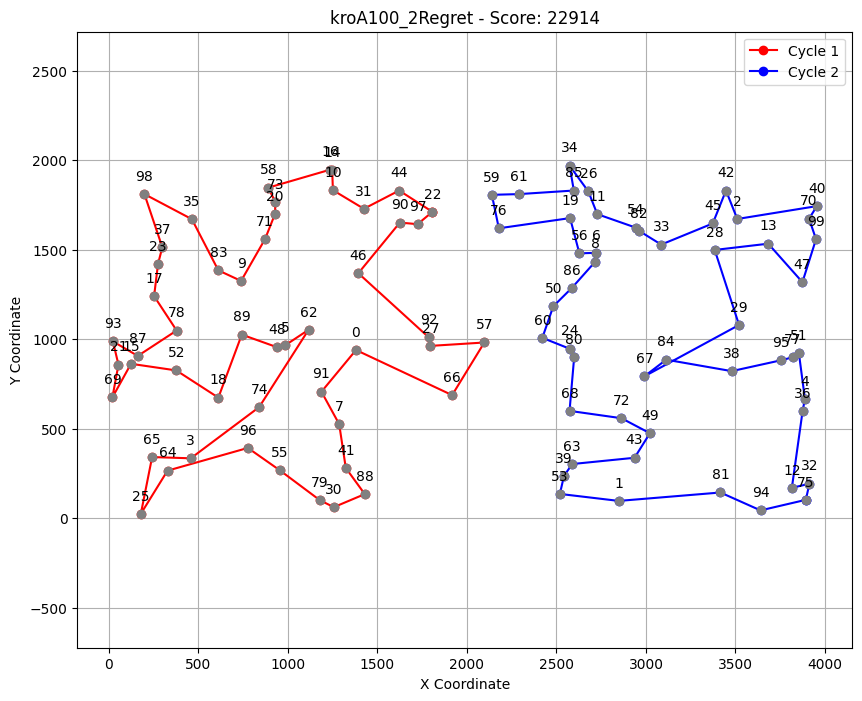

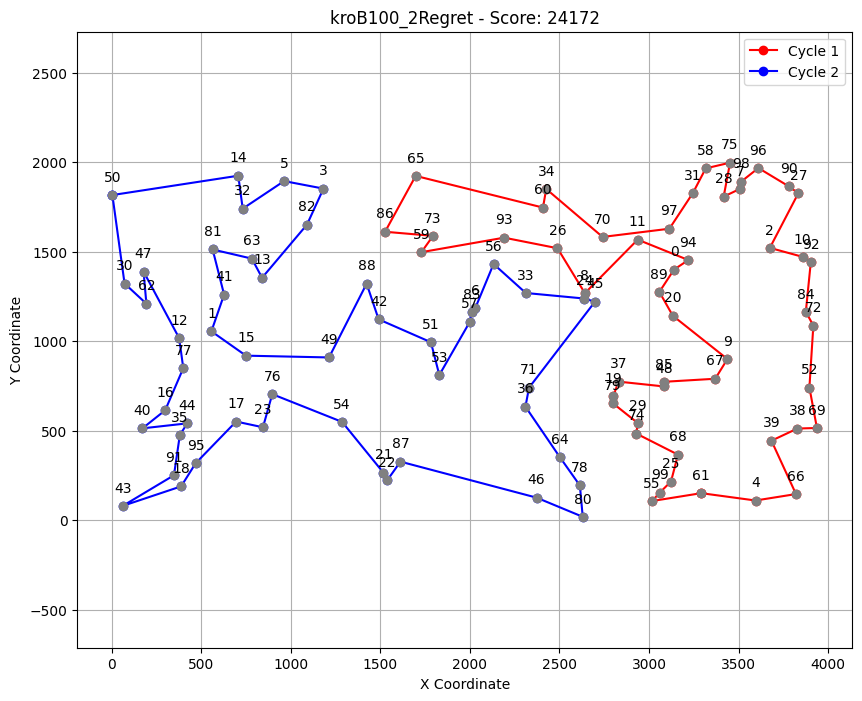

In [5]:
# Plottting best cycles
for instance, cycles in best_cycles.items():
    cycle1, cycle2, score = cycles
    coords = load_data(f'{instance.split("_")[0]}.tsp')
    plot_cycles(coords, cycle1, cycle2, title=f'{instance} - Score: {score}')
    

# Funkcje pomocnicze do local search

In [6]:
def create_random_cycles(distance_matrix):
    num_vertices = len(distance_matrix)
    vertices = list(range(num_vertices))
    random.shuffle(vertices)
    mid = num_vertices // 2
    
    cycle1 = vertices[:mid] + [vertices[0]]
    cycle2 = vertices[mid:] + [vertices[mid]]
    
    return cycle1, cycle2

def calculate_score(cycle1, cycle2, distance_matrix):
    length1 = calculate_cycle_length(cycle1, distance_matrix)
    length2 = calculate_cycle_length(cycle2, distance_matrix)
    return length1 + length2

def swap_between_cycles(cycle1, cycle2, idx1, idx2):
    new_cycle1 = cycle1[:]
    new_cycle2 = cycle2[:]
    new_cycle1[idx1], new_cycle2[idx2] = new_cycle2[idx2], new_cycle1[idx1]
    return new_cycle1, new_cycle2

def delta_swap_vertices_between_cycles(cycle1, cycle2, idx1, idx2, distance_matrix):
    vertex1 = cycle1[idx1]
    vertex2 = cycle2[idx2]

    prev_vertex1 = cycle1[idx1 - 1]
    next_vertex1 = cycle1[(idx1 + 1) % len(cycle1)]  
    prev_vertex2 = cycle2[idx2 - 1]
    next_vertex2 = cycle2[(idx2 + 1) % len(cycle2)]  

    
    original_distance = (distance_matrix[prev_vertex1][vertex1] + 
                         distance_matrix[vertex1][next_vertex1] + 
                         distance_matrix[prev_vertex2][vertex2] + 
                         distance_matrix[vertex2][next_vertex2])

    
    new_distance = (distance_matrix[prev_vertex1][vertex2] + 
                    distance_matrix[vertex2][next_vertex1] + 
                    distance_matrix[prev_vertex2][vertex1] + 
                    distance_matrix[vertex1][next_vertex2])

    delta = new_distance - original_distance
    return delta

def swap_within_cycle(cycle, idx1, idx2):
    new_cycle = cycle[:]
    new_cycle[idx1], new_cycle[idx2] = new_cycle[idx2], new_cycle[idx1]
    return new_cycle

def delta_swap_vertices_within_cycle(cycle, idx1, idx2, distance_matrix):
    if idx1 > idx2:
        idx1, idx2 = idx2, idx1

    
    prev_vertex1 = cycle[idx1 - 1]
    vertex1 = cycle[idx1]
    next_vertex1 = cycle[(idx1 + 1) % len(cycle)]
    prev_vertex2 = cycle[idx2 - 1]
    vertex2 = cycle[idx2]
    next_vertex2 = cycle[(idx2 + 1) % len(cycle)]

    
    if idx2 == idx1 + 1:  
        original_distance = (distance_matrix[prev_vertex1][vertex1] + 
                             distance_matrix[vertex2][next_vertex2])
        
        
        new_distance = (distance_matrix[prev_vertex1][vertex2] + 
                        distance_matrix[vertex1][next_vertex2])
    else:
        original_distance = (distance_matrix[prev_vertex1][vertex1] + 
                             distance_matrix[vertex1][next_vertex1] + 
                             distance_matrix[prev_vertex2][vertex2] + 
                             distance_matrix[vertex2][next_vertex2])
        
        
        new_distance = (distance_matrix[prev_vertex1][vertex2] + 
                        distance_matrix[vertex2][next_vertex1] + 
                        distance_matrix[prev_vertex2][vertex1] + 
                        distance_matrix[vertex1][next_vertex2])

    delta = new_distance - original_distance
    return delta

def swap_edges_in_cycle(cycle, idx1, idx2):
    if idx1 > idx2:
        idx1, idx2 = idx2, idx1
    new_cycle = cycle[:idx1+1] + cycle[idx1+1:idx2+1][::-1] + cycle[idx2+1:]
    return new_cycle

def delta_swap_edges_in_cycle(cycle, idx1, idx2, distance_matrix):
    if idx1 > idx2:
        idx1, idx2 = idx2, idx1

    prev_vertex1 = cycle[idx1]
    next_vertex1 = cycle[(idx1 + 1) % len(cycle)]  
    prev_vertex2 = cycle[idx2]
    next_vertex2 = cycle[(idx2 + 1) % len(cycle)]  

    
    original_distance = (distance_matrix[prev_vertex1][next_vertex1] + 
                         distance_matrix[prev_vertex2][next_vertex2])

    
    new_distance = (distance_matrix[prev_vertex1][prev_vertex2] + 
                    distance_matrix[next_vertex1][next_vertex2])

    delta = new_distance - original_distance
    return delta

def generate_all_vertex_swaps_between_cycles(cycle1, cycle2, distance_matrix):
    possible_swaps = []

    for i in range(len(cycle1) - 1):
        for j in range(len(cycle2) - 1):
            delta = delta_swap_vertices_between_cycles(cycle1, cycle2, i, j, distance_matrix)
            
            if delta < 0:  
                new_cycle1, new_cycle2 = swap_between_cycles(cycle1, cycle2, i, j)
                possible_swaps.append((new_cycle1, new_cycle2, delta))
    
    return possible_swaps

def generate_all_vertex_swaps_within_cycles(cycle1, cycle2, distance_matrix):
    possible_swaps = []

    
    for i in range(len(cycle1) - 1):
        for j in range(i + 1, len(cycle1) - 1):
            delta = delta_swap_vertices_within_cycle(cycle1, i, j, distance_matrix)
            if delta < 0:  
                new_cycle1 = swap_within_cycle(cycle1, i, j)
                possible_swaps.append((new_cycle1, cycle2, delta))

    
    for i in range(len(cycle2) - 1):
        for j in range(i + 1, len(cycle2) - 1):
            delta = delta_swap_vertices_within_cycle(cycle2, i, j, distance_matrix)
            if delta < 0:  
                new_cycle2 = swap_within_cycle(cycle2, i, j)
                possible_swaps.append((cycle1, new_cycle2, delta))
    
    return possible_swaps

def generate_all_edge_swaps_within_cycles(cycle1, cycle2, distance_matrix):
    possible_swaps = []

    
    for i in range(len(cycle1) - 1):
        for j in range(i + 1, len(cycle1) - 1):
            delta = delta_swap_edges_in_cycle(cycle1, i, j, distance_matrix)
            if delta < 0:  
                new_cycle1 = swap_edges_in_cycle(cycle1, i, j)
                possible_swaps.append((new_cycle1, cycle2, delta))

    
    for i in range(len(cycle2) - 1):
        for j in range(i + 1, len(cycle2) - 1):
            delta = delta_swap_edges_in_cycle(cycle2, i, j, distance_matrix)
            if delta < 0:  
                new_cycle2 = swap_edges_in_cycle(cycle2, i, j)
                possible_swaps.append((cycle1, new_cycle2, delta))
    
    return possible_swaps

def generate_all_moves(cycle1, cycle2, distance_matrix):
    possible_moves = []
    possible_moves.extend(generate_all_vertex_swaps_between_cycles(cycle1, cycle2, distance_matrix))
    possible_moves.extend(generate_all_vertex_swaps_within_cycles(cycle1, cycle2, distance_matrix))
    possible_moves.extend(generate_all_edge_swaps_within_cycles(cycle1, cycle2, distance_matrix))
    return possible_moves

def generate_combined_moves_list_1(cycle1, cycle2, distance_matrix):
    possible_moves = []
    possible_moves.extend(generate_all_vertex_swaps_between_cycles(cycle1, cycle2, distance_matrix))
    possible_moves.extend(generate_all_vertex_swaps_within_cycles(cycle1, cycle2, distance_matrix))
    return possible_moves

def generate_combined_moves_list_2(cycle1, cycle2, distance_matrix):
    possible_moves = []
    possible_moves.extend(generate_all_vertex_swaps_between_cycles(cycle1, cycle2, distance_matrix))
    possible_moves.extend(generate_all_edge_swaps_within_cycles(cycle1, cycle2, distance_matrix))
    return possible_moves

def generate_all_moves_random(cycle1, cycle2, distance_matrix):
    possible_moves = []

    
    for i in range(len(cycle1) - 1):
        for j in range(len(cycle2) - 1):
            delta = delta_swap_vertices_between_cycles(cycle1, cycle2, i, j, distance_matrix)
            new_cycle1, new_cycle2 = swap_between_cycles(cycle1, cycle2, i, j)
            possible_moves.append((new_cycle1, new_cycle2, delta))  

    
    for i in range(len(cycle1) - 1):
        for j in range(i + 1, len(cycle1) - 1):
            delta = delta_swap_vertices_within_cycle(cycle1, i, j, distance_matrix)
            new_cycle1 = swap_within_cycle(cycle1, i, j)
            possible_moves.append((new_cycle1, cycle2, delta))  

    
    for i in range(len(cycle2) - 1):
        for j in range(i + 1, len(cycle2) - 1):
            delta = delta_swap_vertices_within_cycle(cycle2, i, j, distance_matrix)
            new_cycle2 = swap_within_cycle(cycle2, i, j)
            possible_moves.append((cycle1, new_cycle2, delta))  

    
    for i in range(len(cycle1) - 1):
        for j in range(i + 1, len(cycle1) - 1):
            delta = delta_swap_edges_in_cycle(cycle1, i, j, distance_matrix)
            new_cycle1 = swap_edges_in_cycle(cycle1, i, j)
            possible_moves.append((new_cycle1, cycle2, delta))  

    
    for i in range(len(cycle2) - 1):
        for j in range(i + 1, len(cycle2) - 1):
            delta = delta_swap_edges_in_cycle(cycle2, i, j, distance_matrix)
            new_cycle2 = swap_edges_in_cycle(cycle2, i, j)
            possible_moves.append((cycle1, new_cycle2, delta))  

    return possible_moves

def steepest_ascent_local_search(cycle1, cycle2, distance_matrix, move_list_generator):
    start_time = time.time()
    best_cycle1, best_cycle2 = cycle1, cycle2
    best_score = calculate_score(best_cycle1, best_cycle2, distance_matrix)  
    
    while True:
        possible_moves = move_list_generator(best_cycle1, best_cycle2, distance_matrix)
        best_delta = 0  
        best_move = None  
        
        
        for new_cycle1, new_cycle2, delta in possible_moves:
            if delta < best_delta:  
                best_delta = delta
                best_move = (new_cycle1, new_cycle2)

        if best_move is not None:
            
            best_cycle1, best_cycle2 = best_move
            best_score += best_delta  
        else:
            
            break
    
    end_time = time.time()
    time_taken = end_time - start_time
    
    return best_cycle1, best_cycle2, best_score, time_taken
    
def greedy_local_search(cycle1, cycle2, distance_matrix, move_list_generator):
    start_time = time.time()
    
    best_cycle1, best_cycle2 = cycle1, cycle2
    best_score = calculate_score(best_cycle1, best_cycle2, distance_matrix)
    
    while True:
        possible_moves = move_list_generator(best_cycle1, best_cycle2, distance_matrix)
        
        
        if not possible_moves:  
            break
        
        
        if random.random() < 0.5:
            possible_moves.reverse()
        
        start_index = random.randint(0, len(possible_moves) - 1)
        improved = False
        
        for i in range(len(possible_moves)):
            index = (start_index + i) % len(possible_moves)
            new_cycle1, new_cycle2, delta = possible_moves[index]
            if delta < 0:  
                best_cycle1, best_cycle2 = new_cycle1, new_cycle2
                best_score += delta  
                improved = True
                break
        
        if not improved:
            break
        
    end_time = time.time()
    time_taken = end_time - start_time
    
    return best_cycle1, best_cycle2, best_score, time_taken

def randomized_optimization(cycle1, cycle2, distance_matrix, time_limit):
    start_time = time.time()
    end_time = start_time + time_limit
    
    best_cycle1, best_cycle2 = cycle1, cycle2
    best_score = calculate_score(best_cycle1, best_cycle2, distance_matrix)
    
    while time.time() < end_time:
        
        possible_moves = generate_all_moves_random(best_cycle1, best_cycle2, distance_matrix)
        if not possible_moves:
            break
        
        
        random_move = random.choice(possible_moves)
        new_cycle1, new_cycle2, score = random_move
        
        
        best_cycle1, best_cycle2 = new_cycle1, new_cycle2
        best_score = calculate_score(best_cycle1, best_cycle2, distance_matrix)  
    
    time_taken = time.time() - start_time
    
    return best_cycle1, best_cycle2, best_score, time_taken


In [9]:
# START LAB 4 
def MSLS(cities, local_search_function, iterations=100):
    best_solution = None
    best_score = float('inf')
    
    for _ in range(iterations):
        # Generate random initial solution
        cycle1, cycle2 = create_random_cycles(cities)
        
        # Perform local search starting from the random solution
        cycle1, cycle2, score, _ = local_search_function(cycle1, cycle2, cities, generate_combined_moves_list_2) # edges
        
        # Update best solution
        if score < best_score:
            best_score = score
            best_solution = (cycle1, cycle2)
    
    return best_solution, best_score


In [8]:
MSLS_solution, MSLS_score = MSLS(distance_matrix_A200, steepest_ascent_local_search, iterations=100)
MSLS_solution
MSLS_score
#7m, 57s

36223

In [10]:
def run_MSLS_multiple_times(cities, local_search_function, num_runs=10, iterations_per_run=100):
    run_data = []  # List to store the results of each run
    best_overall_solution = None
    best_overall_score = float('inf')

    for run in range(num_runs):
        print(f"Running MSLS iteration {run + 1}/{num_runs}...")
        start_time = time.time()
        
        # Run MSLS
        best_solution, best_score = MSLS(cities, local_search_function, iterations=iterations_per_run)
        
        end_time = time.time()
        runtime = end_time - start_time
        
        # Store run results
        run_data.append({
            'Run': run + 1,
            'Best Score': best_score,
            'Runtime (seconds)': runtime
        })
        
        # Track the best overall solution
        if best_score < best_overall_score:
            best_overall_score = best_score
            best_overall_solution = best_solution

    # Convert run data into a DataFrame
    results_df = pd.DataFrame(run_data)

    # Add summary statistics
    summary_data = {
        'Run': ['Min', 'Max', 'Avg'],
        'Best Score': [results_df['Best Score'].min(), 
                       results_df['Best Score'].max(), 
                       results_df['Best Score'].mean()],
        'Runtime (seconds)': [results_df['Runtime (seconds)'].min(), 
                              results_df['Runtime (seconds)'].max(), 
                              results_df['Runtime (seconds)'].mean()]
    }
    summary_df = pd.DataFrame(summary_data)
    
    # Concatenate the detailed results with summary statistics
    final_results_df = pd.concat([results_df, summary_df], ignore_index=True)

    # Return the final DataFrame and the best solution
    return final_results_df, best_overall_solution

In [11]:
results_MSLS, best_solution_MSLS = run_MSLS_multiple_times(distance_matrix_A200, steepest_ascent_local_search, num_runs=10, iterations_per_run=100)


Running MSLS iteration 1/10...
Running MSLS iteration 2/10...
Running MSLS iteration 3/10...
Running MSLS iteration 4/10...
Running MSLS iteration 5/10...
Running MSLS iteration 6/10...
Running MSLS iteration 7/10...
Running MSLS iteration 8/10...
Running MSLS iteration 9/10...
Running MSLS iteration 10/10...


In [12]:
results_MSLS

,Run,Best Score,Runtime (seconds)
0,1,35690.0,479.701890
1,2,36072.0,502.483671
2,3,36218.0,524.513425
3,4,35341.0,519.457648
4,5,35855.0,531.628607
5,6,35706.0,550.821063
6,7,36510.0,538.918547
7,8,36084.0,535.032020
8,9,35612.0,512.117869
9,10,36358.0,529.974824


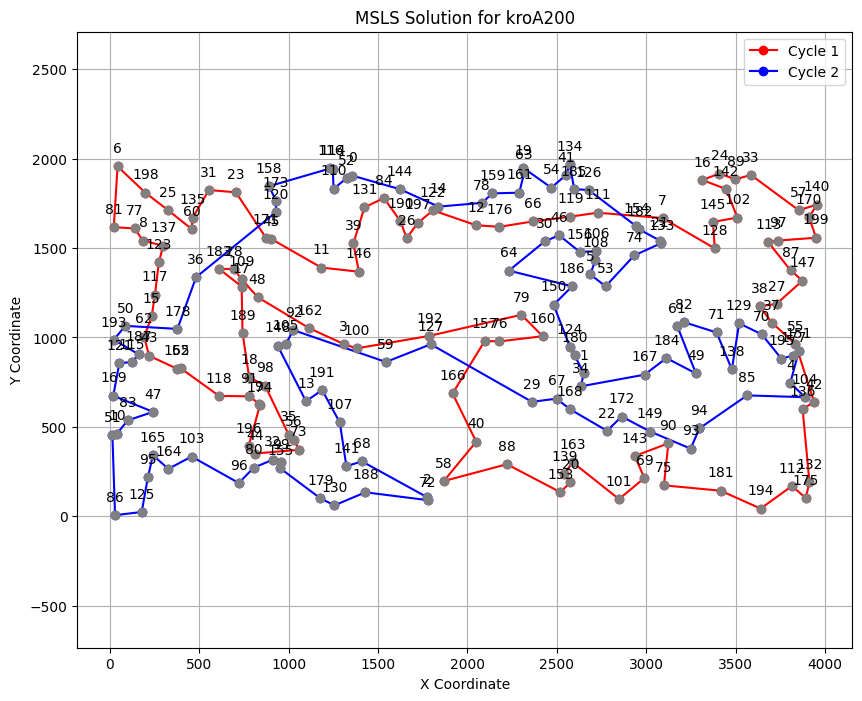

In [13]:
plot_cycles(coords_A200, best_solution_MSLS[0], best_solution_MSLS[1], title='MSLS Solution for kroA200')

In [11]:
#time_limit = average_time_msls = results_MSLS['Runtime (seconds)'].mean()
time_limit = 53

In [24]:
from copy import deepcopy


def ILS1(cities, local_search_function, time_limit, perturbation_strength=5):
    start_time = time.time()
    # Start with a random solution
    cycle1, cycle2 = create_random_cycles(cities)
    
    # Perform initial local search
    cycle1, cycle2, best_score, _ = local_search_function(cycle1, cycle2, cities, generate_combined_moves_list_2) # edges
    
    while time.time() - start_time < time_limit:
        # Create a copy of the best current solution
        new_cycle1, new_cycle2 = deepcopy(cycle1), deepcopy(cycle2)
        
        # Apply a small perturbation (e.g., random swap of vertices)
        for _ in range(perturbation_strength):
            idx1, idx2 = random.randint(0, len(new_cycle1) - 2), random.randint(0, len(new_cycle2) - 2)
            new_cycle1, new_cycle2 = swap_between_cycles(new_cycle1, new_cycle2, idx1, idx2)
        
        # Perform local search on the perturbed solution
        new_cycle1, new_cycle2, new_score, _ = local_search_function(new_cycle1, new_cycle2, cities, generate_combined_moves_list_2)
        
        # Update the best solution if the new one is better
        if new_score < best_score:
            cycle1, cycle2 = new_cycle1, new_cycle2
            best_score = new_score
    
    return cycle1, cycle2, best_score


In [25]:
cycle1, cycle2, best_score = ILS1(distance_matrix_A, steepest_ascent_local_search, time_limit)

In [26]:
cycle1, cycle2, best_score

([19,
  56,
  8,
  6,
  54,
  82,
  45,
  42,
  2,
  13,
  70,
  40,
  99,
  47,
  29,
  38,
  84,
  67,
  49,
  43,
  1,
  53,
  39,
  63,
  68,
  66,
  41,
  88,
  30,
  79,
  55,
  96,
  74,
  18,
  52,
  15,
  87,
  78,
  83,
  9,
  71,
  20,
  73,
  58,
  16,
  14,
  10,
  31,
  44,
  76,
  76],
 [21,
  93,
  17,
  23,
  37,
  98,
  35,
  89,
  48,
  5,
  62,
  46,
  90,
  97,
  22,
  59,
  61,
  34,
  85,
  26,
  11,
  33,
  28,
  95,
  77,
  51,
  4,
  36,
  32,
  75,
  12,
  94,
  81,
  72,
  80,
  24,
  86,
  50,
  60,
  57,
  27,
  92,
  0,
  91,
  7,
  3,
  64,
  25,
  65,
  69,
  21],
 25092)

In [27]:
def run_ILS1_multiple_times(cities, local_search_function, num_runs=10, time_limit=60, perturbation_strength=5):
    run_data = []  # List to store the results of each run
    best_overall_solution = None
    best_overall_score = float('inf')

    for run in range(num_runs):
        print(f"Running ILS1 iteration {run + 1}/{num_runs}...")
        start_time = time.time()
        
        # Run ILS1
        best_solution, best_score = ILS1(cities, local_search_function, time_limit, perturbation_strength)
        
        end_time = time.time()
        runtime = end_time - start_time
        
        # Store run results
        run_data.append({
            'Run': run + 1,
            'Best Score': best_score,
            'Runtime (seconds)': runtime
        })
        
        # Track the best overall solution
        if best_score < best_overall_score:
            best_overall_score = best_score
            best_overall_solution = best_solution

    # Convert run data into a DataFrame
    results_df = pd.DataFrame(run_data)

    # Add summary statistics
    summary_data = {
        'Run': ['Min', 'Max', 'Avg'],
        'Best Score': [results_df['Best Score'].min(), 
                       results_df['Best Score'].max(), 
                       results_df['Best Score'].mean()],
        'Runtime (seconds)': [results_df['Runtime (seconds)'].min(), 
                              results_df['Runtime (seconds)'].max(), 
                              results_df['Runtime (seconds)'].mean()]
    }
    summary_df = pd.DataFrame(summary_data)
    
    # Concatenate the detailed results with summary statistics
    final_results_df = pd.concat([results_df, summary_df], ignore_index=True)

    # Return the final DataFrame and the best solution
    return final_results_df, best_overall_solution


In [ ]:
results_ILS1, best_solution_ILS1 = run_ILS1_multiple_times(distance_matrix_A, steepest_ascent_local_search, num_runs=10, time_limit=time_limit, perturbation_strength=5)

In [9]:
def repair_solution(cycle1, cycle2, remaining_vertices, cities):
    visited = set(cycle1 + cycle2)
    while remaining_vertices:
        cycle1 = insert_with_2_regret(cycle1, visited, cities)
        remaining_vertices -= visited
        if remaining_vertices:
            cycle2 = insert_with_2_regret(cycle2, visited, cities)
            remaining_vertices -= visited
    return cycle1, cycle2

In [18]:
from copy import deepcopy

def ILS2(cities, local_search_function, time_limit, destroy_fraction=0.3):
    start_time = time.time()
    # Start with a random solution
    cycle1, cycle2 = create_random_cycles(cities)
    
    # Perform initial local search
    cycle1, cycle2, best_score, _ = local_search_function(cycle1, cycle2, cities, generate_combined_moves_list_2)
    
    while time.time() - start_time < time_limit:
        # Create a copy of the best current solution
        new_cycle1, new_cycle2 = deepcopy(cycle1), deepcopy(cycle2)
        
        # Large-scale perturbation: remove a portion of vertices and repair the solution
        destroy_count = int(destroy_fraction * (len(new_cycle1) + len(new_cycle2)))
        vertices_to_remove = random.sample(new_cycle1[:-1] + new_cycle2[:-1], destroy_count)
        
        for vertex in vertices_to_remove:
            # Remove vertex from the cycles
            if vertex in new_cycle1:
                new_cycle1.remove(vertex)
            else:
                new_cycle2.remove(vertex)
        
        # Repair: Use a heuristic (e.g., regret heuristic) to reinsert the removed vertices
        remaining_vertices = set(range(len(cities))) - set(new_cycle1 + new_cycle2)
        new_cycle1, new_cycle2 = repair_solution(new_cycle1, new_cycle2, remaining_vertices, cities)
        
        # Perform local search on the repaired solution
        new_cycle1, new_cycle2, new_score, _ = local_search_function(new_cycle1, new_cycle2, cities, generate_combined_moves_list_2)
        
        # Update the best solution if the new one is better
        if new_score < best_score:
            cycle1, cycle2 = new_cycle1, new_cycle2
            best_score = new_score
    
    return cycle1, cycle2, best_score


In [19]:
cycle1, cycle2, best_score = ILS2(distance_matrix_A, steepest_ascent_local_search, time_limit)

In [20]:
cycle1, cycle2, best_score

([23,
  37,
  98,
  35,
  71,
  20,
  73,
  58,
  16,
  14,
  10,
  31,
  44,
  22,
  76,
  50,
  86,
  56,
  8,
  6,
  45,
  42,
  2,
  13,
  70,
  40,
  99,
  47,
  51,
  77,
  95,
  4,
  36,
  32,
  75,
  12,
  94,
  81,
  49,
  72,
  68,
  80,
  24,
  60,
  57,
  66,
  27,
  92,
  0,
  91,
  7,
  74,
  18,
  52,
  78],
 [88,
  41,
  30,
  79,
  55,
  96,
  3,
  64,
  25,
  65,
  69,
  21,
  15,
  87,
  93,
  17,
  83,
  9,
  89,
  48,
  5,
  62,
  46,
  90,
  97,
  59,
  61,
  34,
  85,
  26,
  19,
  11,
  54,
  82,
  33,
  28,
  29,
  38,
  84,
  67,
  43,
  1,
  63,
  39,
  53],
 24084)

In [ ]:
def run_ILS2_multiple_times(cities, local_search_function, num_runs=10, time_limit=60, destroy_fraction=0.3):
    run_data = []  # List to store the results of each run
    best_overall_solution = None
    best_overall_score = float('inf')

    for run in range(num_runs):
        print(f"Running ILS2 iteration {run + 1}/{num_runs}...")
        start_time = time.time()
        
        # Run ILS2
        best_solution, best_score = ILS2(cities, local_search_function, time_limit, destroy_fraction)
        
        end_time = time.time()
        runtime = end_time - start_time
        
        # Store run results
        run_data.append({
            'Run': run + 1,
            'Best Score': best_score,
            'Runtime (seconds)': runtime
        })
        
        # Track the best overall solution
        if best_score < best_overall_score:
            best_overall_score = best_score
            best_overall_solution = best_solution

    # Convert run data into a DataFrame
    results_df = pd.DataFrame(run_data)

    # Add summary statistics
    summary_data = {
        'Run': ['Min', 'Max', 'Avg'],
        'Best Score': [results_df['Best Score'].min(), 
                       results_df['Best Score'].max(), 
                       results_df['Best Score'].mean()],
        'Runtime (seconds)': [results_df['Runtime (seconds)'].min(), 
                              results_df['Runtime (seconds)'].max(), 
                              results_df['Runtime (seconds)'].mean()]
    }
    summary_df = pd.DataFrame(summary_data)
    
    # Concatenate the detailed results with summary statistics
    final_results_df = pd.concat([results_df, summary_df], ignore_index=True)

    # Return the final DataFrame and the best solution
    return final_results_df, best_overall_solution

In [ ]:
results_ILS2, best_solution_ILS2 = run_ILS2_multiple_times(distance_matrix_A, steepest_ascent_local_search, num_runs=10, time_limit=time_limit, destroy_fraction=0.3)